In [1]:
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('../Data/RestaurantVisitors.csv',index_col='date',parse_dates=True)

In [4]:
df.index.freq='D'

In [5]:
df.head()

,weekday,holiday,holiday_name,rest1,rest2,rest3,rest4,total
date,,,,,,,,
2016-01-01,Friday,1,New Year's Day,65.0,25.0,67.0,139.0,296.0
2016-01-02,Saturday,0,na,24.0,39.0,43.0,85.0,191.0
2016-01-03,Sunday,0,na,24.0,31.0,66.0,81.0,202.0
2016-01-04,Monday,0,na,23.0,18.0,32.0,32.0,105.0
2016-01-05,Tuesday,0,na,2.0,15.0,38.0,43.0,98.0


- We are see how the holiday column effects the total column
- or we can say that we are gonna see the relation between exogenous columns and their effect on the number of visitors.

- First lets do SARIMA

- We got 478 resturant data and additional 39 days for forecasting 

In [6]:
df1=df.dropna()      # For now we removed the NaN data

In [7]:
df1.tail()

,weekday,holiday,holiday_name,rest1,rest2,rest3,rest4,total
date,,,,,,,,
2017-04-18,Tuesday,0,na,30.0,30.0,13.0,18.0,91.0
2017-04-19,Wednesday,0,na,20.0,11.0,30.0,18.0,79.0
2017-04-20,Thursday,0,na,22.0,3.0,19.0,46.0,90.0
2017-04-21,Friday,0,na,38.0,53.0,36.0,38.0,165.0
2017-04-22,Saturday,0,na,97.0,20.0,50.0,59.0,226.0


- In the data above we have till 22nd april after using dropna()

- Now, gonna change the data type of last 5 columns from floating point to integers, as humans cannot be counted as decimal #.

In [8]:
df1.columns

Index(['weekday', 'holiday', 'holiday_name', 'rest1', 'rest2', 'rest3',
       'rest4', 'total'],
      dtype='object')

In [9]:
cols=['rest1', 'rest2', 'rest3', 'rest4', 'total']

In [10]:
for column in cols:
    df1[column] = df1[column].astype(int)

In [11]:
df1.head()

,weekday,holiday,holiday_name,rest1,rest2,rest3,rest4,total
date,,,,,,,,
2016-01-01,Friday,1,New Year's Day,65,25,67,139,296
2016-01-02,Saturday,0,na,24,39,43,85,191
2016-01-03,Sunday,0,na,24,31,66,81,202
2016-01-04,Monday,0,na,23,18,32,32,105
2016-01-05,Tuesday,0,na,2,15,38,43,98


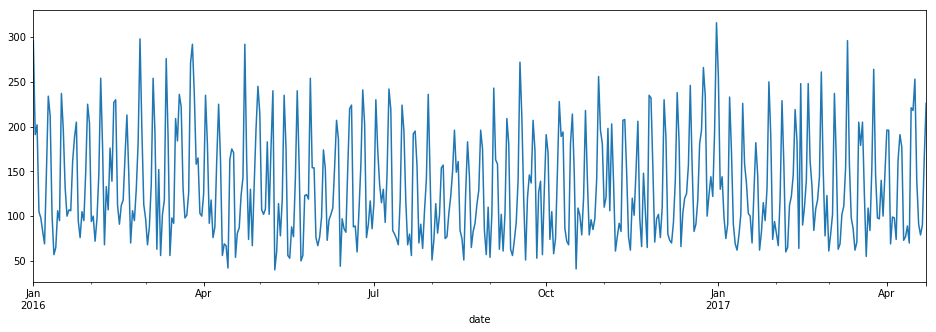

In [12]:
df1['total'].plot(figsize=(16,5)).autoscale(axis='x',tight=True)

- Now, we are gonna overlap, when there is a  holiday



- First we are gonna grab the index of where the holiday column is 1. 

In [13]:
df1.query('holiday==1').index

DatetimeIndex(['2016-01-01', '2016-01-18', '2016-02-02', '2016-02-14',
               '2016-02-15', '2016-03-17', '2016-03-25', '2016-03-27',
               '2016-03-28', '2016-05-05', '2016-05-08', '2016-05-30',
               '2016-06-19', '2016-07-04', '2016-09-05', '2016-10-10',
               '2016-10-31', '2016-11-11', '2016-11-24', '2016-11-25',
               '2016-12-24', '2016-12-25', '2016-12-31', '2017-01-01',
               '2017-01-16', '2017-02-02', '2017-02-14', '2017-02-20',
               '2017-03-17', '2017-04-14', '2017-04-16', '2017-04-17'],
              dtype='datetime64[ns]', name='date', freq=None)

In [14]:
# Another way to do it is:

df1[df1['holiday']==1].index

DatetimeIndex(['2016-01-01', '2016-01-18', '2016-02-02', '2016-02-14',
               '2016-02-15', '2016-03-17', '2016-03-25', '2016-03-27',
               '2016-03-28', '2016-05-05', '2016-05-08', '2016-05-30',
               '2016-06-19', '2016-07-04', '2016-09-05', '2016-10-10',
               '2016-10-31', '2016-11-11', '2016-11-24', '2016-11-25',
               '2016-12-24', '2016-12-25', '2016-12-31', '2017-01-01',
               '2017-01-16', '2017-02-02', '2017-02-14', '2017-02-20',
               '2017-03-17', '2017-04-14', '2017-04-16', '2017-04-17'],
              dtype='datetime64[ns]', name='date', freq=None)

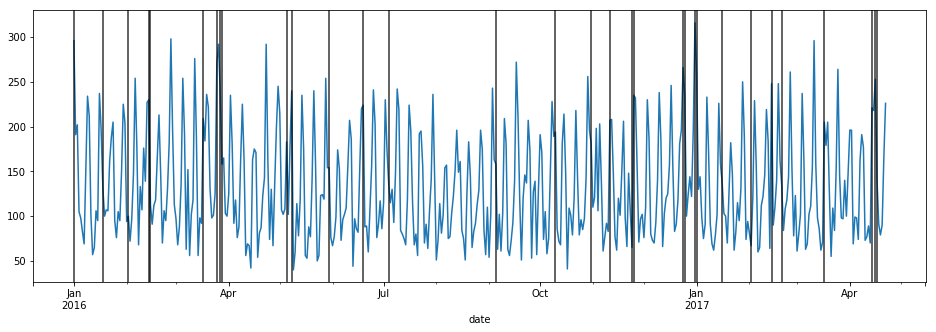

In [15]:
ax=df1['total'].plot(figsize=(16,5))#.autoscale(axis='x',tight=True)

# df1.query('holiday==1').index      returns the dates which are holiday

# now for the dates(their indexes) where holiday is 1, I am gonna add a vertical line on the plot

for day in df1.query('holiday==1').index:
    ax.axvline(x=day,color='black',alpha=0.8);

- axvline()  is a matplotlib command to add a vertical line

- It's a little hard to tell if there are certain peaks or dips that relate exactly to these holidays, exogenous variables
- it's a little unclear whether or not this exogenous variable is really going to be predictive of how many visitors show up to these restaurants.

Now, lets do a ETS decompostion

In [16]:
from statsmodels.tsa.seasonal import seasonal_decompose

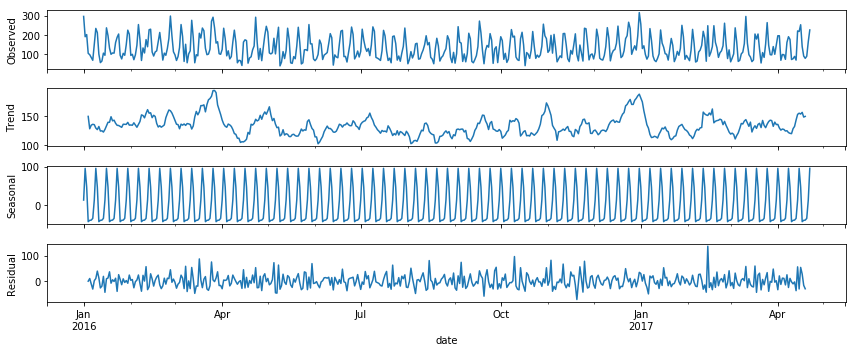

In [17]:
from pylab import rcParams
rcParams['figure.figsize']=12,5

result=seasonal_decompose(df1['total'])
result.plot();

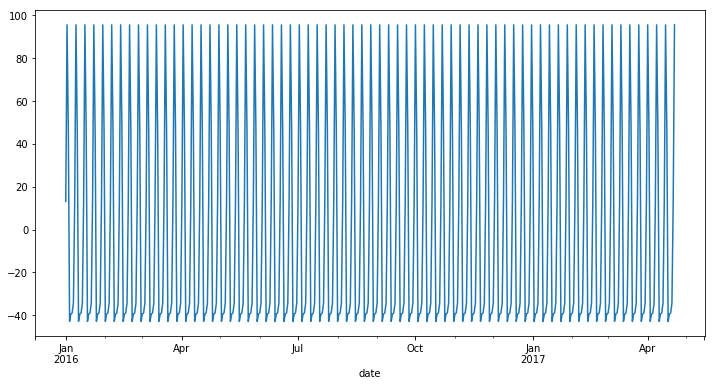

In [18]:
result.seasonal.plot(figsize=(12,6))

- Here we can see that seasonality is weekly

# Now,lets work on modelling, fitting and forecasting

In [19]:
len(df1)

478

In [20]:
train=df1.iloc[:436]

In [21]:
test=df1.iloc[436:]

In [22]:
from pmdarima import auto_arima

In [23]:
import warnings
warnings.filterwarnings('ignore')
auto_arima(df1['total'],seasonal=True,m=7).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                
=========================================================================================
Dep. Variable:                                 y   No. Observations:                  478
Model:             SARIMAX(1, 0, 0)x(2, 0, 0, 7)   Log Likelihood               -2417.721
Date:                           Sat, 12 Jun 2021   AIC                           4845.442
Time:                                   19:44:06   BIC                           4866.290
Sample:                                        0   HQIC                          4853.638
                                           - 478                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     20.5662      4.363      4.714      0.000      12.015      29.118
ar.L1          0.1897      0.045      4.221      0.000       0.102       0.278
ar.S.L7        0.4258      0.037     11.606      0.000       0.354       0.498
ar.S.L14       0.3873      0.036     10.734      0.000       0.317       0.458
sigma2      1427.3967     86.679     16.468      0.000    1257.510    1597.283
===================================================================================
Ljung-Box (Q):                       77.20   Jarque-Bera (JB):                27.47
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.81   Skew:                             0.47
Prob(H) (two-sided):                  0.18   Kurtosis:                         3.71
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

- above, right now I'm passing in the entire data set because here I'm just grabbing the orders.

In [24]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

- Theta here is less than one. This is the invertible process
- so the most recent observations have higher weight than observations from the more distant past.
- So we can say that invertible process is preferred
- But in some cases when SARIMA model forces invertibility, it generates some error. 
- Error:   value error, non-invertible starting M.A parameters found.
- Thats why we drop it here below.

In [25]:
model=SARIMAX(train['total'],order=(1,0,0),seasonal_order=(2,0,0,7),enforce_invertibility=False)

In [26]:
results = model.fit()

In [27]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                
=========================================================================================
Dep. Variable:                             total   No. Observations:                  436
Model:             SARIMAX(1, 0, 0)x(2, 0, 0, 7)   Log Likelihood               -2224.701
Date:                           Sat, 12 Jun 2021   AIC                           4457.403
Time:                                   19:44:07   BIC                           4473.713
Sample:                               01-01-2016   HQIC                          4463.840
                                    - 03-11-2017                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2212      0.047      4.711      0.000       0.129       0.313
ar.S.L7        0.5063      0.036     14.187      0.000       0.436       0.576
ar.S.L14       0.4574      0.037     12.379      0.000       0.385       0.530
sigma2      1520.2899     82.277     18.478      0.000    1359.029    1681.550
===================================================================================
Ljung-Box (Q):                       83.96   Jarque-Bera (JB):                29.23
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.86   Skew:                             0.34
Prob(H) (two-sided):                  0.37   Kurtosis:                         4.07
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [28]:
start = len(train)

In [29]:
end=len(train)+len(test)-1

In [30]:
predictions = results.predict(start,end).rename('SARIMA Model')

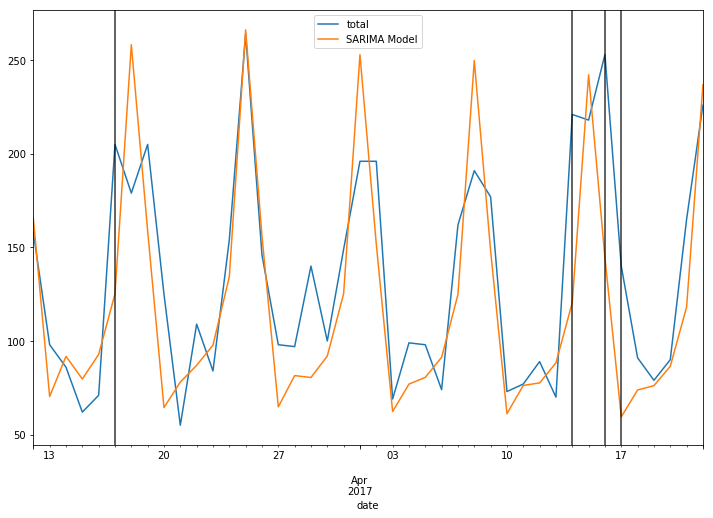

In [31]:
ax = test['total'].plot(legend=True,figsize=(12,8))#.autoscale(axis='x',tight=True)
predictions.plot(legend=True)#.autoscale(axis='x',tight=True)
ax.autoscale(axis='x',tight=True)
for day in test.query('holiday==1').index:
    ax.axvline(x=day,color='black',alpha=0.8);

- here above, some points didn't do any great job predicting 

- let's add in markers above to see if there was any holidays affecting our predictions there,

-  it'll be interesting to see if adding in the holidays as exogenous variables would actually improve our model.

- The last thing I want to do is evaluate the model quantitatively using root mean squared error.

In [32]:
from statsmodels.tools.eval_measures import rmse

- This rmse is really important because visually it's sometimes a little hard

to tell the actual performance of the model, but if we take the rmse, we'll be able to directly

compare that rmse to the exogenous pr SARIMAX models

In [33]:
rmse(test['total'],predictions)

41.263154972797885

In [34]:
test['total'].mean()

134.26190476190476

- So, we can see that we are doing okay, not have the best fitting model
-  in the next lecture, let's see if adding information about the holidays allows the model to learn better and have better forecasts or predictions into the future

- when we're actually doing the forecasting for the future dates, not only do we provide the date range, but we also provide the exogenous variable for that future date range.

- Maybe you're running a sort of quarterly business cycle and you're using some sort of business events for your exogenous data and maybe you don't know when your business is going to promote its next sale, but you know relatively well within one or two days when it's going to promote that sale. So you can go ahead and add that in as an exogenous variable.

- first step is to see if the same weights that we used during our seasonal Arima model actually apply to our seasonal Arima exogenous model or SARIMAX.

- whenever you're using exogenous variables of stats models, keep in mind that Stats Models is expecting this to have two sets of brackets or Brace's
- because We actually need a data frame because exogenous can mean multiple columns.
- single column gives series.

In [35]:
#df['holiday']                    #gives a series
df1[['holiday']]                     # gives a dataframe

,holiday
date,
2016-01-01,1
2016-01-02,0
2016-01-03,0
2016-01-04,0
2016-01-05,0
2016-01-06,0
2016-01-07,0
2016-01-08,0
2016-01-09,0


In [36]:
auto_arima(df1['total'], exogenous=df1[['holiday']],seasonal=True,m=7).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                
=========================================================================================
Dep. Variable:                                 y   No. Observations:                  478
Model:             SARIMAX(0, 0, 1)x(2, 0, 0, 7)   Log Likelihood               -2348.679
Date:                           Sat, 12 Jun 2021   AIC                           4709.359
Time:                                   19:44:30   BIC                           4734.377
Sample:                                        0   HQIC                          4719.195
                                           - 478                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     11.5586      4.273      2.705      0.007       3.184      19.934
x1            74.8467      4.546     16.463      0.000      65.936      83.757
ma.L1          0.1782      0.051      3.475      0.001       0.078       0.279
ar.S.L7        0.5058      0.045     11.228      0.000       0.418       0.594
ar.S.L14       0.3842      0.043      8.980      0.000       0.300       0.468
sigma2      1142.1098     80.202     14.240      0.000     984.917    1299.303
===================================================================================
Ljung-Box (Q):                       85.03   Jarque-Bera (JB):                 1.78
Prob(Q):                              0.00   Prob(JB):                         0.41
Heteroskedasticity (H):               0.89   Skew:                             0.12
Prob(H) (two-sided):                  0.44   Kurtosis:                         3.18
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

- the above block takes time to run generally

# Train our SARIMAX

In [37]:
model = SARIMAX(train['total'],exog=train[['holiday']],order=(0,0,1),seasonal_order=(2,0,0,7),enforce_invertibility=False)

In [38]:
result = model.fit()

In [39]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                
=========================================================================================
Dep. Variable:                             total   No. Observations:                  436
Model:             SARIMAX(0, 0, 1)x(2, 0, 0, 7)   Log Likelihood               -2158.891
Date:                           Sat, 12 Jun 2021   AIC                           4327.783
Time:                                   19:44:32   BIC                           4348.171
Sample:                               01-01-2016   HQIC                          4335.829
                                    - 03-11-2017                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
holiday       67.9544      4.278     15.886      0.000      59.570      76.338
ma.L1          0.2057      0.050      4.117      0.000       0.108       0.304
ar.S.L7        0.5146      0.042     12.369      0.000       0.433       0.596
ar.S.L14       0.4598      0.041     11.135      0.000       0.379       0.541
sigma2      1118.0451     73.447     15.223      0.000     974.092    1261.998
===================================================================================
Ljung-Box (Q):                      101.65   Jarque-Bera (JB):                 1.29
Prob(Q):                              0.00   Prob(JB):                         0.52
Heteroskedasticity (H):               0.90   Skew:                             0.11
Prob(H) (two-sided):                  0.54   Kurtosis:                         3.14
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

lets find out our predicted value on our test set 

In [40]:
start=len(train)

In [41]:
end=len(train)+len(test)-1

In [42]:
predictions = result.predict(start,end,exog=test[['holiday']]).rename('SARIMAX with Exog')


Above:
- I'm not actually passing in test total here.
- So this results model doesn't know about the actual totals into the future, but it does know about the exogenous variable into the future, which is an important distinction.

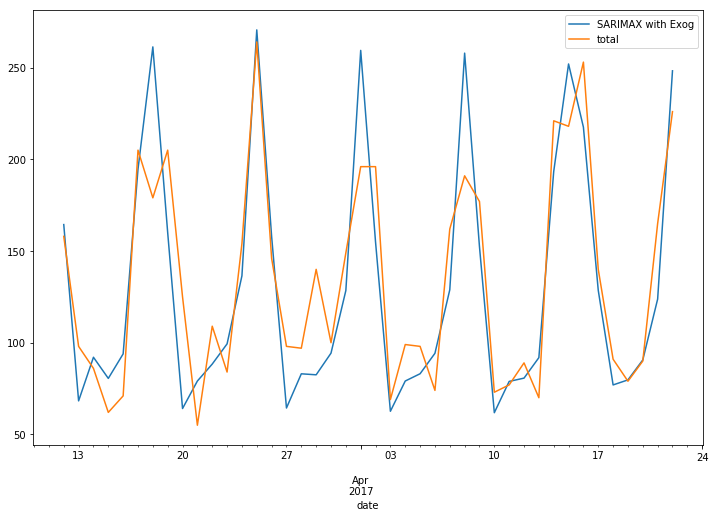

In [43]:
predictions.plot(figsize=(12,8),legend=True)
test['total'].plot(legend=True)

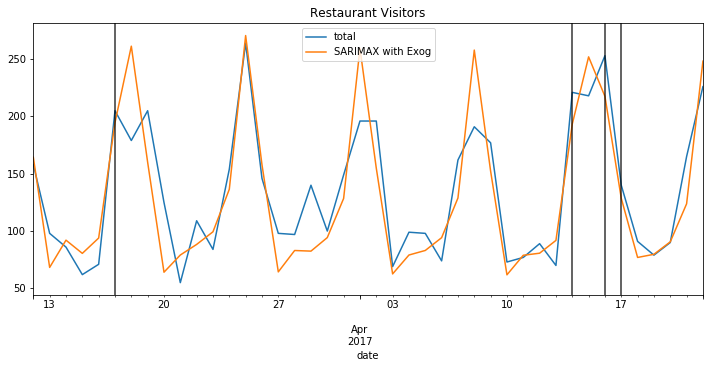

In [44]:
ax = test['total'].plot(legend=True,figsize=(12,5),title='Restaurant Visitors')#.autoscale(axis='x',tight=True)
predictions.plot(legend=True)#.autoscale(axis='x',tight=True)
ax.autoscale(axis='x',tight=True)
for day in test.query('holiday==1').index:
    ax.axvline(x=day,color='black',alpha=0.8);

- it's able to hit those points where the holidays occurred with much more accuracy than before.
- But somewhere is deviating from better results
- Then how to decide whether we should use exogenous or not
- One way is to calculate the rmse of these new predictions

In [45]:
rmse(test['total'],predictions)


31.09251362899617

- this error was 42.something before using exogenous variable

- Now, for future prediction, should I use SARIMA or SARIMAX
- we will mostly look for qualitative measures, like what we want to include or what not 


- I am gonna include SARIMAX model

In [46]:
model =SARIMAX(df1['total'],exog=df1['holiday'],order=(0,0,1),seasonal_order=(2,0,0,7),enforce_invertibility=False)

In [47]:
results=model.fit()

# Forecast

In [48]:
df.tail()

,weekday,holiday,holiday_name,rest1,rest2,rest3,rest4,total
date,,,,,,,,
2017-05-27,Saturday,0,na,NaN,NaN,NaN,NaN,NaN
2017-05-28,Sunday,0,na,NaN,NaN,NaN,NaN,NaN
2017-05-29,Monday,1,Memorial Day,NaN,NaN,NaN,NaN,NaN
2017-05-30,Tuesday,0,na,NaN,NaN,NaN,NaN,NaN
2017-05-31,Wednesday,0,na,NaN,NaN,NaN,NaN,NaN


In [49]:
df[478:]

,weekday,holiday,holiday_name,rest1,rest2,rest3,rest4,total
date,,,,,,,,
2017-04-23,Sunday,0,na,NaN,NaN,NaN,NaN,NaN
2017-04-24,Monday,0,na,NaN,NaN,NaN,NaN,NaN
2017-04-25,Tuesday,0,na,NaN,NaN,NaN,NaN,NaN
2017-04-26,Wednesday,0,na,NaN,NaN,NaN,NaN,NaN
2017-04-27,Thursday,0,na,NaN,NaN,NaN,NaN,NaN
2017-04-28,Friday,0,na,NaN,NaN,NaN,NaN,NaN
2017-04-29,Saturday,0,na,NaN,NaN,NaN,NaN,NaN
2017-04-30,Sunday,0,na,NaN,NaN,NaN,NaN,NaN
2017-05-01,Monday,0,na,NaN,NaN,NaN,NaN,NaN


In [50]:
exog_forecast=df[478:][['holiday']]

In [51]:
fcast = results.predict(len(df1),len(df1)+38,exog=exog_forecast).rename("FINAL SARIMAX FORECAST")

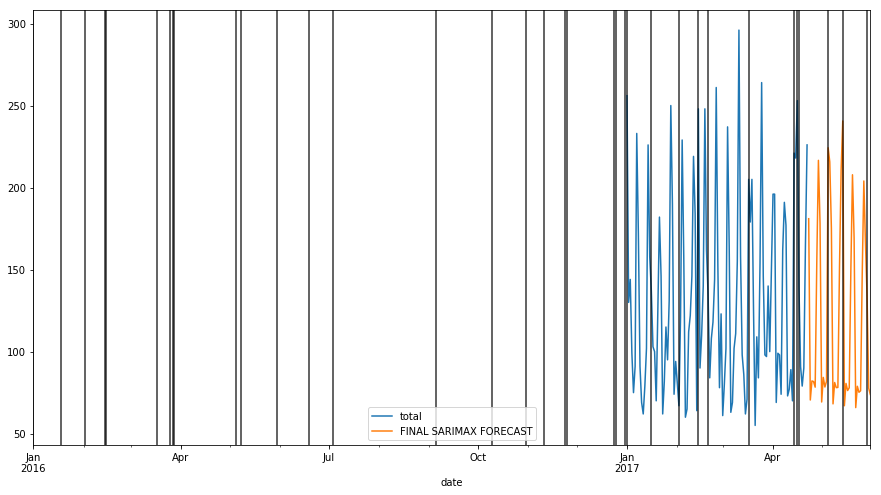

In [54]:
ax = df1['total'].loc['2017-01-01':].plot(figsize=(15,8),legend=True)
fcast.plot(legend=True)
ax.autoscale(axis='x',tight=True)
for x in df.query('holiday==1').index:
    ax.axvline(x=x,color='black',alpha=0.8);

- it looks like it's not able to accurately predict the low ends or the higher peak ends.

- it also seems to be taking into account some future time points where if you notice a little peak kind of in the middle here is performing quite a bit better than those other two peaks behind it and in front of it.

- Lets go ahead and see if there is a holiday that is affecting/causing the peak by calling the holiday loop in above graph